### В этом проекте запросы по sql я делал в тренажере яндекса, доступа к БД у меня нет, для наглядности своей работы я сделал такой 'костыль' (код запроса и ниже скрин результата из тренажера)

In [3]:
from IPython.display import Image
from IPython.core.display import HTML 

#### Найдите количество рейсов на каждой модели самолёта с вылетом в сентябре 2018 года. Назовите получившееся поле flights_amount и выведите его. Также напечатайте на экране поле model. Столбцы в таблице должны быть выведены в следующем порядке:

    model
    flights_amount

In [ ]:
SELECT
   
    aircrafts.model AS model,
    COUNT(flights.flight_id) AS flights_amount
FROM
    flights
LEFT JOIN aircrafts ON aircrafts.aircraft_code  = flights.aircraft_code
WHERE
    DATE_TRUNC('month',departure_time ) = '2018-09-01 00:00:00'
GROUP BY
    model

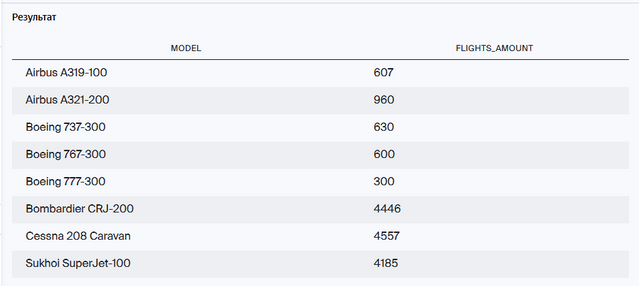

In [10]:
display(Image('https://i.ibb.co/Ycncvt6/1.png', width=1900, unconfined=False))

#### Посчитайте количество рейсов по всем моделям самолётов Boeing, Airbus и другим ('other') в сентябре. Типы моделей поместите в столбец type_aircraft, а количество рейсов — во flights_amount. Выведите их на экран.

In [ ]:
SELECT
    COUNT(flight_id) AS flights_amount
FROM
    flights
INNER JOIN aircrafts ON aircrafts.aircraft_code = flights.aircraft_code
WHERE
    EXTRACT(MONTH FROM departure_time) = '9' AND (model LIKE 'Boeing%' OR model LIKE 'Airbus%');

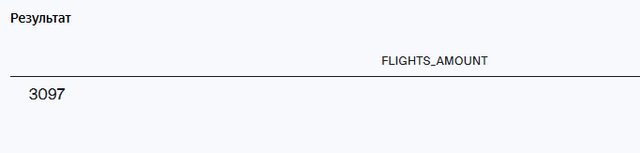

In [11]:
display(Image('https://i.ibb.co/SJzp1tH/2.png', width=1900, unconfined=False))

#### Посчитайте среднее количество прибывающих рейсов в день для каждого города за август 2018 года. Назовите получившееся поле average_flights, вместе с ним выведите столбец city.

In [ ]:
SELECT
    FPD.city AS city,
    AVG(FPD.cnt) AS average_flights
FROM
(SELECT 
    airports.city AS city,
    COUNT(flights.flight_id) AS cnt,
    DATE_TRUNC('day', arrival_time) AS date
FROM
    flights
INNER JOIN airports ON airports.airport_code = flights.arrival_airport
GROUP BY
    city, 
    date) AS FPD
GROUP BY
    city;

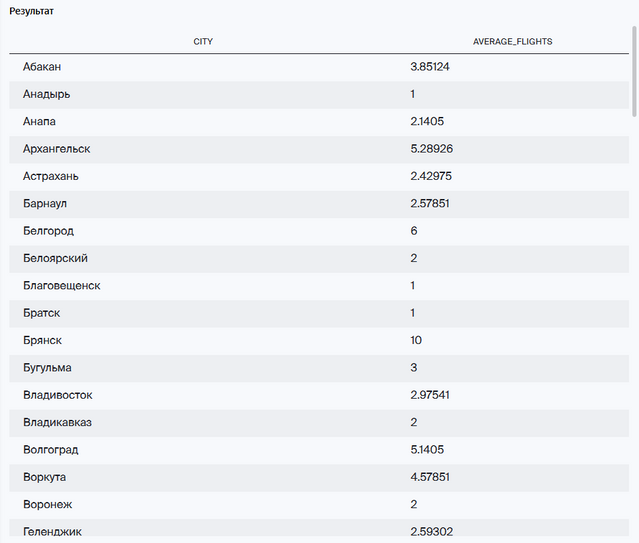

In [12]:
display(Image('https://i.ibb.co/mGTtPV2/3.png', width=1900, unconfined=False))

#### Установите фестивали, которые проходили с 23 июля по 30 сентября 2018 года в Москве, и номер недели, в которую они проходили. Выведите название фестиваля festival_name и номер недели festival_week.

In [ ]:
SELECT
    festival_name,
    EXTRACT(week FROM festival_date) AS festival_week
FROM
    festivals
WHERE
    festival_date BETWEEN '2018-07-22' AND '2018-10-01' AND
    festival_city = 'Москва'


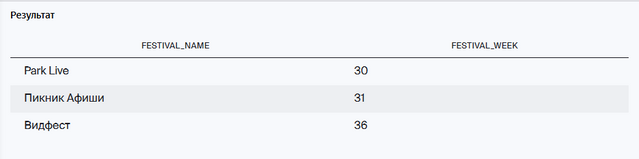

In [13]:
display(Image('https://i.ibb.co/hCLq81V/4.png', width=1900, unconfined=False))

#### Для каждой недели с 23 июля по 30 сентября 2018 года посчитайте количество билетов, купленных на рейсы в Москву (номер недели week_number и количество билетов ticket_amount). Получите таблицу, в которой будет информация о количестве купленных за неделю билетов; отметка, проходил ли в эту неделю фестиваль; название фестиваля festival_name и номер недели week_number.
Выводите столбцы в таком порядке: - week_number - ticket_amount - festival_week - festival_name

In [ ]:
SELECT
    T.week_number,
    T.ticket_amount,
    T.festival_week,
    T.festival_name
FROM
(
(SELECT
        EXTRACT (week FROM flights.departure_time) AS week_number,
        COUNT(ticket_flights.ticket_no) AS ticket_amount
    FROM
        airports
    INNER JOIN
        flights
    ON
        airports.airport_code = flights.arrival_airport
    INNER JOIN
        ticket_flights
    ON
        flights.flight_id = ticket_flights.flight_id
    WHERE
        airports.city = 'Москва'
        AND CAST(flights.departure_time AS date) BETWEEN '2018-07-23' AND '2018-09-30'
    GROUP BY
        week_number
) t
LEFT JOIN
(SELECT
        festival_name,
        EXTRACT (week FROM festivals.festival_date) AS festival_week
    FROM
        festivals
    WHERE
        festival_city = 'Москва'
      AND CAST(festivals.festival_date AS date) BETWEEN '2018-07-23' AND '2018-09-30'
) t2
ON
    t.week_number = t2.festival_week
) AS T

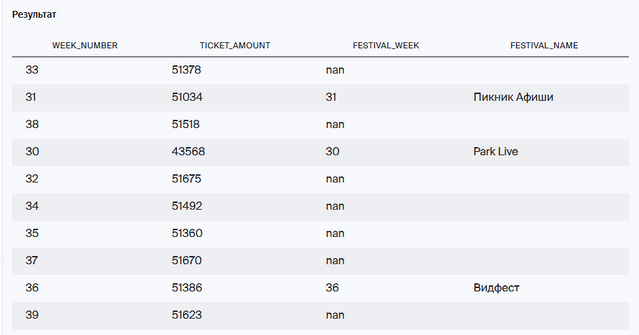

In [14]:
display(Image('https://i.ibb.co/17pg5G6/5.png', width=1900, unconfined=False))

### Результаты 1,3,5 задания были сохранены в файлы query_1, 3, 5 их я использовал в следующем блокносте для анализа данных